# Oscillatory Mechanism Explanation
The oscillatory mechanism that a CT-RNN can learn to solve our modular arithmetic task is not immediately obvious. Thus, we created this script with the purpose of showing a smplified example.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(5)

## Code

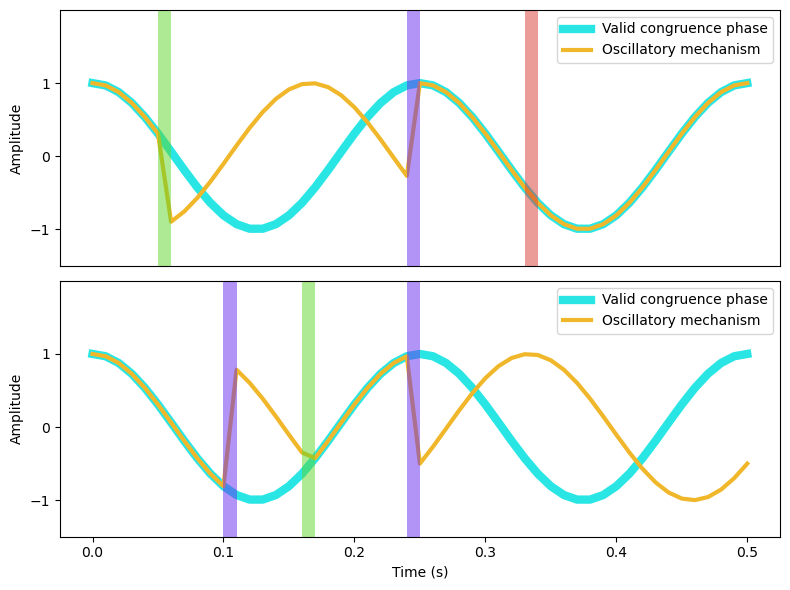

In [2]:
# Constants
w = (2*np.pi)/0.25 # frequency for simplification, adjust as needed

# Phases for the colors
colors_phase = {
    'green': +2 * np.pi / 3,
    'purple': -2 * np.pi / 3,
    'red': 0
}

def create_trial(SET_combination):
    input_sequence = np.zeros(51)

    # Select random "ball" positions, ensuring minimum index distance of 5 between each "ball"
    while True:
        ball_indices = sorted(np.random.choice(range(3, 38), size=3, replace=False))
        if all(ball_indices[i] - ball_indices[i-1] >= 5 for i in range(1, len(ball_indices))):
            break

    # Place the colors at the ball positions
    for i, ball_idx in enumerate(ball_indices):
        color = SET_combination[i]
        if color == 'green':
            input_sequence[ball_idx] = 2  # 2 for green
        elif color == 'purple':
            input_sequence[ball_idx] = 1  # 1 for purple
        elif color == 'red':
            input_sequence[ball_idx] = -1  # 0 for red

    return input_sequence

def get_oscillation(input_sequence, time):
    cumulative_phi = np.zeros_like(time)
    for t in range(1, len(time)):
        color_idx = int(input_sequence[t])
        if color_idx in [-1, 1, 2]:  # check if there's a valid color at this timestep
            if color_idx == -1:
                color_idx = 0
            color = ['red', 'purple', 'green'][color_idx]
            cumulative_phi[t] = cumulative_phi[t-1] + colors_phase[color]
        else:
            cumulative_phi[t] = cumulative_phi[t-1]
    return np.cos(w * time + cumulative_phi)

def plot_dynamics(ax, time, oscillation, sequence):
    ax.plot(time, np.cos(w*time), color="#29E6E5", label="Valid congruence phase", zorder=0, linewidth=6)
    ax.plot(time, oscillation, color="#F0B72B", label="Oscillatory mechanism", zorder=1, linewidth=3)
    for j, color_value in enumerate(sequence):
        color = {2: "#5CD629", 1: "#662BF0", -1: "#DA3A32"}.get(color_value)
        if color:
            ax.axvspan(time[j-1], time[j], facecolor=color, alpha=0.5)
    ax.set_ylim(-1.5, 2.0)
    ax.set_yticks([-1, 0, 1])  # Setting y-axis ticks
    ax.legend()

def generate_dynamics_plot():
    time = np.linspace(0, 0.5, 51)

    # Creating trials
    trials = [['green', 'purple', 'red'], ['purple', 'green', 'purple']]
    input_sequences = [create_trial(trial) for trial in trials]
    oscillations = [get_oscillation(seq, time) for seq in input_sequences]

    # Plotting
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(8, 6))

    for i, ax in enumerate([ax0, ax1]):
        plot_dynamics(ax, time, oscillations[i], input_sequences[i])
        ax.set_ylabel("Amplitude")  # Setting y-axis label

    ax0.set_xticks([])
    ax1.set_xlabel("Time (s)")

    plt.tight_layout()
    plt.savefig('../results/script_examples/oscillatory_mechanism.png')
    plt.show()

generate_dynamics_plot()